## Part 1 - Data Preprocessing
Importing the libraries

numpy (np): A library for numerical computations and handling arrays.

matplotlib.pyplot (plt): Used for data visualization, specifically for plotting graphs.

pandas (pd): A library for handling datasets, offering tools to read, manipulate, and analyze structured data.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [126]:
#Select only the second column (Open price) and converts it into a NumPy array.
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values



## Display Data

In [127]:
dataset_train
len(training_set)
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling
• MinMaxScaler: Scales the data to a range of 0 to 1, which is important for RNN models to ensure efficient learning.

• sc.fit_transform(training_set): Fits the scaler to the training data and transforms it into scaled values between 0 and 1

In [128]:
 #Feature Scaling
 from sklearn.preprocessing import MinMaxScaler
 sc = MinMaxScaler(feature_range = (0, 1))
 training_set_scaled = sc.fit_transform(training_set)

##  Creating a data structure with 60 timesteps and 1 output
Initializes two empty lists: X_train (input) and y_train (output).

 For each i from 60 to 1257:
 X_train.append(training_set_scaled[i-60:i, 0]): Appends the past 60 days of stock prices as a sequence (input).

 y_train.append(training_set_scaled[i, 0]): Appends the stock price of the current day (i.e., the day after the 60 days) as the output.

 np.array(): Converts the lists to NumPy arrays for efficient processing in the RNN model.

In [129]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

 ## Displays the shape and values of X_train and y_train

In [130]:
X_train.shape, X_train
y_train.shape, y_train


((1198,),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

## Reshaping
  np.reshape(): Reshapes X_train into a 3D array with shape (batch_size, timesteps, features) where:
  
  batch_size: Number of samples in the training set.

  timesteps: Number of days (60) used for prediction.

  features: Each timestep contains one feature (the stock price)

In [131]:

 X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Importing the Keras libraries and packages
 Sequential: Initializes a linear stack of layers (used to build the LSTM)

 Dense: Creates fully connected layers in the neural network.

 LSTM: Adds the LSTM layer.

 Dropout: A regularization technique that randomly drops neurons during training to prevent overfitting

In [132]:
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import LSTM
 from keras.layers import Dropout

## Initialising the LSTM
Initializes a Sequential LSTM model called regressor.

In [133]:
regressor = Sequential()

## Adding the first LSTM layer and Dropout
LSTM(units=50): Adds the first LSTM layer with 50 units (neurons).

return_sequences=True: Ensures that the LSTM returns the output sequence of each timestep (required for stacked LSTMs).

input_shape=(X_train.shape[1], 1): Specifies the shape of the input data (60 timesteps, 1 feature per timestep).

Dropout(0.2): Drops 20% of neurons to prevent overfitting

In [134]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Adding additional LSTM layers and Dropout
 Adds three more LSTM layers, each with 50 units and each with dropout of 20%.

 The return_sequences parameter is True for the first two layers (to allow stacking) and False for the last layer (since it's the final
layer in the stack).

In [135]:
 regressor.add(LSTM(units = 50, return_sequences = True))
 regressor.add(Dropout(0.2))
 regressor.add(LSTM(units = 50, return_sequences = True))
 regressor.add(Dropout(0.2))
 regressor.add(LSTM(units = 50))
 regressor.add(Dropout(0.2))

## Adding the output layer
Adds a fully connected (dense) output layer with one unit (for predicting one stock price).

In [136]:
regressor.add(Dense(units = 1))

## Compiling the LSTM
 optimizer='adam': Uses the Adam optimization algorithm for efficient gradient descent.

 loss='mean_squared_error': Uses mean squared error (MSE) as the loss function, which is standard for regression problems.

In [137]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


## Fitting the LSTM to the Training set
Trains the LSTM model on X_train and y_train for 100 epochs with a batch size of 32 (i.e., processes 32 samples at a time before
updating the weights).

In [138]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 0.0868
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0058
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0060
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0072
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0044
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0043
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9

## Part 3 - Making Predictions and Visualizing Results
Getting the real stock price of 2017.

Reads the test set (Google_Stock_Price_Test.csv) and extracts the actual stock prices for 2017 into real_stock_price.

In [139]:
 dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
 real_stock_price = dataset_test.iloc[:, 1:2].values

## Getting the predicted stock price of 2017
pd.concat(): Concatenates the training and test sets along the vertical axis (stock prices of both periods).
Prepares the last 60 stock prices before the test set as input.

sc.transform(inputs): Scales the inputs to the same range (0 to 1) used during training

In [140]:

 dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
 inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
 inputs = inputs.reshape(-1,1)
 inputs = sc.transform(inputs)


## Creating test data structure
 Similar to the training set, it creates a sequence of the last 60 stock prices for each day in the test set.

In [141]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Predicting the stock price
Predicts the stock price using the trained LSTM model and rescales the predicted values back to their original scale.

In [142]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step



 ## Visualizing the results
  Plots the real stock prices (red) and the predicted stock prices (blue) on the same graph for visual comparison.

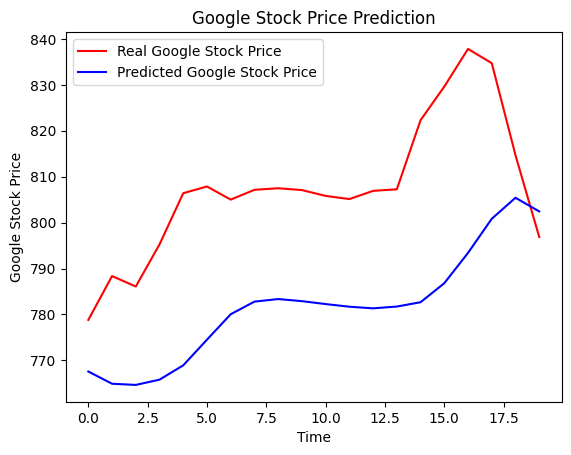

In [143]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()